# Odoo
- 遵循MVC设计原则
- odoo是多层架构，主要有三层：数据层，逻辑层和展示层。
    - 1.数据层
        - 数据层是最底层的一层，负责数据的存储和持久化（直接与数据库交互进行增删改查等操作），odoo使用postgresql（支持RDBMS标准）数据库来实现。（RDBMS表示关系数据库管理系统（Relational Database Management System））
    - 2.逻辑层
        - 由odoo服务器控制，负责所有对数据层的交互。在正常的情况下，只允许该层直接访问数据库以保证数据库安全与同步
        - odoo核心使用ORM引擎，ORM提供了丰富的API以供新增的模块和数据交互使用（ORM引擎会根据我们的Python方法与之对应的实体自动生成SQL语句）
    - 3.展示层
        - 负责展示数据以及与用户的直接数据交互
        - 展示层是使用rpcs（远程过程调用）来调用ORM API,然后odoo服务器根据获取的请求返回响应，展示层获取响应后进行数据处理
        - odoo自带全功能开箱即用的web客户端。使用Qweb模板引擎进行渲染
- 应用和模块的区别：应用是一个独立的系统，比如CRM；而模块只是一组较为独立的功能。
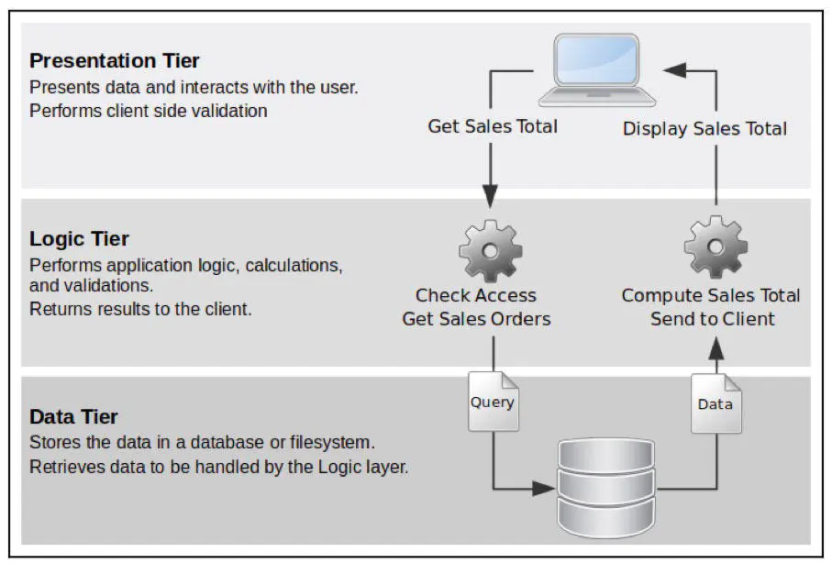




# odoo的执行过程
- odoo启动是使用odoo-bin这个可执行脚本实现的，odoo-bin可以接收很多命令行参数（在前面加上-或者--），同时也可以接收子命令
- 子命令它们都在 odoo/cli 的目录下面（以.py文件方式呈现），比如scaffold，server，shell等
- oboo-bin具体执行过程：
    - 子命令分析
        - 如果没有加上任何子命令，那么默认调用的是
    - 初始化配置、连接数据库、加载、升级或者安装模块
        - 加载base，web模块
            - base 定义了 Odoo 的基本数据和及其逻辑，web 主要是提供了 Odoo 的用户界面。
            - 加载模块实际上就是把模块的目录 import 进来，并且加载 manifest 信息。
    - 选择线程或者进程模式，启动 Odoo WEB 服务 （werkzeug wsgi）
        - Odoo 使用 WSGI 协议来启动 WEB 服务，需要注意的是，如果在反向代理的模式下，需要通过命令行参数告知 Odoo，这样 Odoo 会对反向代理的 WEB 请求进行一些特殊操作。（主要是处理一些 X-Forwarded-xxx 的环境变量）

        - 如果不使用 --workers 参数，那么 Odoo 默认使用线程模式，否则是进程模式。

## base模块
- base模块中的模型主要可分为两种：
    - 信息资源库（Information Repository）:其模块的外部ID一般是以"ir"开头
        - 可用于存储一些基础功能，odoo使用这些基础功能来识别菜单，视图，模型和动作等
    - 资源（Resource）:其模块的外部ID一般是以“res.”开头
        - 包含了域国际化相关的一些模型，所有的模型都提供了底层的服务
        
## odoo模块下的文件
- demo和security文件夹分别用于演示数据和安全控制文件的存放
- models文件下存放的是.py文件，一般是用来定义模型的，controllers也是放的.py文件，controllers.py是解释浏览器的请求并返回数据
- views下面是xml文件，用于配置视图
- __manifest__.py文件
    - 它是以字典的形式存放的数据，各个关键字含义如下：
            ‘name’: “模块名称”,
            ‘summary’: 模块概述",
            ‘description’: ‘‘模块详细描述’’’,
            ‘author’: ‘开发者名字’,
            ‘website’: ‘可以写上本模块相关的网址’,
             'category’:‘模块所属分类’,
            ‘version’: ‘版本’可以 辅助进行模块的版本管理,
            ‘depends’:[‘需要依赖的模块，在安装本模块时，会先安装依赖模块’],默认是base模块，
            ‘data’:配置视图文件.xml
            ‘demo’:演示数据文件.xml
            以下是没有默认出现的一些关键字参数
             ‘installable’:默认是True，表示该文件是否能被前端搜索到
             ‘auto_install’：默认False，如果设置为TRUE，在在depends参数的模块安装完成后，自动安装本模块（该方式一般用于处理两个模块需要 配合使用的情况）
 

## 模型
- 模型是通过继承Odoo 模板的Python来实现的，创建了模型之后，odoo会同ORM引擎在数据库自动创建表
- 模型的属性字段（用于描述整个模型）：
    - _name:（模型）类的唯一标识字段，其他类（模型）可以通过该字段来引用本类
    - _description:类似于标签，提高查询的友好性
    - _order:设置该模型的记录集展示时默认的排序字段
    - _rec_name:是record name的缩写，用来指定一个字段作为该记录的描述，一般来讲，odoo默认使用name字段作为一条记录的描述
    - _table:指定该模型映射在数据库中的表名
    - _inherit：继承自谁
    - _iherits：继承多个
### 模型的种类
- models.Model
- models.TransientModel(瞬态模型）
    - 可用于向导式用户交互，其数据也是存储于数据库表的，只不过是临时存储，会有作业定期从这些表中删除老数据
- models.AbstractModel(抽象模型）
- 没有数据库表为其存储数据，仅仅是为了方便子类复用字段或方法，自己本身并不需要存储数据
        
### 模型的字段类型
- fields.Char()
- fields.Text()
- fields.Selection()  下拉框
    - fields.Selection([("db_value", "front_value"), string=""]
- fields.Html("文档")
- fields.Integer(), Float(string, digits),digits是一个元组，前面代表总位数，后面代表小数精度
- fields.Date(), Datetime
- fields.Boolean()
- fields.Binary()
#### 模型里面的保留字段（即在创建数据库时会默认创建的字段）
- 作为开发人员不能修改保留字段
- 字段有以下：
    - id:这是记录的唯一标识
    - create_date：记录创建的日期
    - create_uid：记录创建的用户
    - write_date：记录最后的修改日期
    - write_uid:记录最后修改的用户
    - _last_update:该字段不会实际存储值，仅起到并发检查的作用

### 字段常用属性
- string：前端展现时的字段描述属性 
- default：字段的默认值属性，可以是静态值也可是匿名函数
- size：仅在Char中有效
- translate：在Char、Text、HTML中字段起作用
- help：进行前端展示时，发送给用户的提示信息
- readonly：默认为False，True表示在前端不可编辑，只读，在模型层通过函数更改数据不会受到影响
- required：表示不能为空，在前端和模型层面都有用
- index：设置为True，表示为该字段添加索引
- copy：默认非关系字段是True，如果设置为False，则在复制记录时，该字段不会被复制
- groups：用于限定该字段的访问安全组，通过外部ID进行设定groups="base.group_portal"
- states:该属性时通过字典来设置UI的相关属性,required，readonly，invisible都可以通过该字段设置：states={'done':['readonly', True]}
- deprecated:如果设置为True，则一旦使用该字段，日志中记录警告信息
- oldname：如果一个字典在新版本中更改了名字，则可以使用该属性记录老版本的名字

## 关于视图.xml文件中tag的解释
- ir.actions.act_window它是一个模型，所有的窗口动作都存放在该模型中。常用属性如下：
    - views ：一个(view_id, view_type)对的列表。每一对中的第二个元素是视图的类别(树、表单、图……)，第一个元素是一个可选的数据库id(或False)。如果没有提供id，客户机应该为请求的模型获取指定类型的默认视图(这是由fields_view_get()自动完成的)。列表的第一种类型是默认视图类型，在执行操作时默认打开。每种视图类型最多只能在列表中出现一次
    - res_id (optional)：如果默认视图是form，指定要加载的记录(否则应该创建一个新记录)
    - search_view_id (optional)：id, name)对，id是加载操作的特定搜索视图的数据库标识符。默认获取模型的默认搜索视图
    - name：是指通过本窗口动作打开的视图的标题
    - res_model：是窗体动作的模型名称
    - view_mode：用于声明可用的视图类型及其顺序名称，第一个是执行动作时默认打开的视图
    - target：如果设置为new，则将在弹出的对话框窗口中打开视图，默认情况下是current，表示在主内容区域中打开新视图
    - context设置目标视图的上下文信息，可用设置默认值或激活过滤器等
    - domain：域表达式，可强制对打开的视图中可浏览的记录进行过滤
    - limit：是列表视图中每个页面的记录数
- 同理，视图数据都是存储在数据库的ir.ui.view模型中的
- 菜单数据都是存储在ir.ui.menu模型中的
- res_model代表视图取数的模型，view_mode代表按顺序展示的视图类型
- arch元素内部包含的类型可以是tree/form或search,arch后面必须要跟上type="xml"

# odoo中的动作类型
- 可以细分为以下六种：
        URL Actions (ir.actions.act_url)
        Server Actions (ir.actions.server)
        Report Actions (ir.actions.report)
        Client Actions (ir.actions.client)
        Automated Actions (ir.cron)

## 动作属性
- 所有操作都有两个强制属性：type, name。
    - type：当前操作的类别，决定可以使用哪些字段以及如何解释该操作。
    - name：简短的用户可读的动作描述，可以显示在客户端的界面上。
- 除了两个强制属性外，所有操作还共享可选属性，用于在任意模型的上下文菜单中表示操作
    - binding_model_id：指定动作绑定到哪个模型
    - binding_type：指定绑定的类型，这主要是操作将出现在下面的上下文菜单。action (default)：指定操作将出现在绑定模型的操作上下文菜单中。report：指定操作将出现在绑定模型的“打印上下文”菜单中。
    - binding_view_types：以逗号分隔的视图类型列表，动作会出现在上下文菜单中，主要是“list”和/或“form”。默认列表，表单(列表和表单)

## ir.actions.act_window
- ir.actions.act_window它是一个模型，所有的窗口动作都存放在该模型中。常用属性如下：
    - views ：由 (view_id, view_type) 这样的元组对组成的列表。每一对中的第二个元素是视图的类别(树、表单、图……)，第一个元素是一个可选的数据库id(或False)。如果没有提供id，客户机应该为请求的模型获取指定类型的默认视图(这是由fields_view_get()自动完成的)。列表的第一种类型是默认视图类型，在执行操作时默认打开。每种视图类型最多只能在列表中出现一次
        - views 是一个计算字段，该字段会根据 view_ids, view_mode 和 view_id 自动计算出来，大致分为三个步骤：
            - 1.从 view_ids 中顺序取出 id 和视图类型，组成 (view_id, view_type) 元组对加入到 views 列表中
            - 2.若定义了 view_id 且对应的视图类型不在 view_ids 中，则加入到 views 中
            - 3.最后对 view_mode 中指定的视图类型，但是不存在于 view_ids 和 view_id 中，则将其 view_id 置为 False 组成元组对后加入到 views 中
    - view_ids：关联的视图对象 id，需注意区分和 view_id 的区别
    - view_id：关联的视图的 id, 例如在不同时候需要打开同一个数据模型不同的表单视图，就可以通过这个字段指定要打开的视图的 id
    - res_id (optional)：仅在视图类型为 form 时有效，表示打开该 id 对应的记录的表单视图，如未指定则打开新建页面
    - search_view_id (optional)：id, name)对，id是加载操作的特定搜索视图的数据库标识符。默认获取模型的默认搜索视图
    - name：是指通过本窗口动作打开的视图的标题
    - res_model：需要在view里显示数据的model
    - src_model：应该在哪个模型上该动作可用
    - view_mode：用于声明可用的视图类型及其顺序名称，第一个是执行动作时默认打开的视图
    - target：如果设置为new，则将在弹出的对话框窗口中打开视图，默认情况下是current，表示在主内容区域中打开新视图
    - context设置目标视图的上下文信息，可用设置默认值或激活过滤器等
    - domain：域表达式，可强制对打开的视图中可浏览的记录进行过滤
    - limit：是列表视图中每个页面的记录数
    - multi：如果设置为 True 且动作绑定了模型（src_model）的话，该动作按钮会只出现在所绑定模型列表视图的「动作」下拉列表中（在搜索视图左侧），使它在列表视图中可用，以便它可以应用于多条选中的记录。 默认值为False。
- 数据库内窗口(即xml中，上面的字段属性应该是在.py文件返回时定义的）操作有几个不同的字段，这些字段应该被客户端忽略，主要用于组成视图列表
    - view_mode (default= tree,form )
        - 以逗号分隔的视图类型列表(/!)\没有空格/!)。所有这些类型都将出现在生成的视图列表中(至少有一个假view_id)
    - view_ids
        - 用于查看对象，定义视图的初始内容
    - 举例：
                <record model="ir.actions.act_window.view" id="test_action_tree">
                   <field name="sequence" eval="1"/>
                   <field name="view_mode">tree</field>
                   <field name="view_id" ref="view_test_tree"/>
                   <field name="act_window_id" ref="test_action"/>
                </record>


- 举例如下：
        ps：使用列表和表单视图打开客户(与客户标志集合作)
        {
            "type": "ir.actions.act_window",
            "res_model": "res.partner",
            "views": [[False, "tree"], [False, "form"]],
            "domain": [["customer", "=", true]],
        }

        ps：或者在新对话框中打开特定产品的表单视图(分别获得)
        {
            "type": "ir.actions.act_window",
            "res_model": "product.product",
            "views": [[False, "form"]],
            "res_id": a_product_id,
            "target": "new", # 新窗口
        }

## ir.actions.act_url
- 允许打开一个URL(网站/网页)通过Odoo的行动。可以通过两个字段自定义:url target
- 举例：该段代码表示将由url中的地址，取代当前页面
        {
            "type": "ir.actions.act_url",
            "url": "https://odoo.com",
            "target": "self",
        }

## ir.actions.server
- 服务器的行为模型。服务器动作在一个基础模型上工作，并提供各种类型的动作，这些动作可以自动执行，例如使用基础动作规则，或者通过在“More”上下文菜单中添加动作来手动执行。
- 常用的操作有：
        ' Execute Python Code ':将被执行的Python代码块
        ‘Create a new Record’:用新值创建一个新记录
        ‘Write on a Record’: 更新记录
        ‘Execute several actions’: 定义触发其他几个服务器操作的操作
- 属性如下（.py文件中）：
    - id 要运行的服务器操作的数据库内标识符
    - context (optional) 运行服务器操作时要使用的上下文数据
    - model_id 当前的动作是在哪个模型上运行的
    - state：
        - 1.code: 执行通过code参数给出的python代码.
        - 2.object_create: 按照fields_lines规范创建模型crud_model_id的新记录
        - 3.object_write: 按照fields_lines规范更新当前记录
        - 4.multi: 执行通过child_ids参数给出的几个操作。
    - code：对应 state 的类型 code，为当前动作运行时所要执行的 Python 代码
        - 字段 code 里面的内容，在这里面我们有一些变量是可以直接使用的：
            - env：Odoo 的运行环境
            - model：动作触发时对应的 Odoo 模型实例
            - record：动作触发时对应的单个记录（如在表单视图中运行对应当前表单所指向的记录），可能是空的
            - records：动作触发时对应的记录集（如在列表视图中勾选多条记录触发，记录集指向这些选中的记录），可能是空的
            - Python 库：time, datetime, dateutil, timezone 时间相关的 Python 库
            - log：用来记录日志信息
            - Warning：通过 raise Warning('xxxxx') 抛出警告信息
            - 还有一个 action 变量，当我们想让当前动作执行完毕之后，返回一个新的动作继续执行，就可以将返回的动作的定义（一个字典）赋值给变量 action，客户端将会自动执行该动作。
- 数据库内的记录要丰富得多，可以根据它们的状态执行许多特定的或通用的操作。状态之间共享某些字段(和相应的行为)（即xml中）
    - 字段的状态：据其状态，行为是通过不同的字段定义的。在每个字段之后给出相关的状态。
        - 字段有：
            - code (code)：指定调用动作时要执行的一段Python代码
            - crud_model_id (create)(required)：要在其中创建新记录的模型
            - link_field_id (create)：many2one ir.model.field，指定应该在其上设置新创建的记录的当前记录的m2o字段(模型应该匹配)。
            - fields_lines (create/write):
            - child_ids (multi):
        - 举例：
                <record model="ir.actions.server" id="print_instance">
                    <field name="name">Res Partner Server Action</field>
                    <field name="model_id" ref="model_res_partner"/>
                    <field name="state">code</field>
                    <field name="code">
                        if record.some_condition():
                            action = {
                                "type": "ir.actions.act_window",
                                "view_mode": "form",
                                "res_model": record._name,
                                "res_id": record.id,
                            }
                    </field>
                </record>


## ir.actions.report
- 出发打印报表
- 如果您通过< record>而不是< report>标签定义报表，并且希望该操作显示在模型视图的打印菜单中，您还需要从Bindings中指定binding_model_id。没有必要设置binding_type来报告，因为ir.actions.report将隐式默认为该值。
- 属性有：
    - name (mandatory)：如果未指定print_report_name，则用作文件名。否则，只有在从某种类型的列表中查找时，才可用作报表的助记符/描述
    - model (mandatory)：你的报告将涉及的模型
    - report_type (default=qweb-pdf)：qweb-pdf用于PDF报告，qweb-html用于HTML报告
    - report_name (mandatory)：用于呈现报表的qweb模板的名称(外部id)
    - print_report_name：定义报表名称的python表达式
    - groups_id：Many2many 字段设置为允许查看/使用当前报表的组
    - multi ：如果设置为True，该操作将不会在表单视图中显示
    - paperformat_id：Many2one字段到您希望用于本报告的论文格式(如果未指定，将使用公司格式)
    - attachment_use： 如果设置为True，则报告只在第一次请求时生成一次，然后从存储的报告中重新打印，而不是每次都重新生成。
    - 可以用于只能生成一次的报告(例如，出于法律原因)
    - attachment：定义报表名称的python表达式;记录可以作为变量对象访问

## ir.actions.client
- 触发一个完全在客户端中实现的操作。
- tag 操作的客户端标识符，一个客户端应该知道如何响应的任意字符串
- params (optional) 客户端操作是否应该在主内容区(当前)、全屏模式(全屏)或对话框/弹出窗口(新建)打开。使用main而不是current来清除面包屑。默认为当前。
- 举例：
        {
            "type": "ir.actions.client",
            "tag": "pos.ui"
        }

## ir.cron
- 动作自动触发在预先设定的频率。
- 属性有：
    - name 自动操作的名称(主要用于日志显示)
    - interval_number 两次执行该操作之间的interval_type uom数目
    - interval_type 频率间隔的测量单位
    - numbercall 操作必须运行的次数。如果该操作预计将无限期运行，则将其设置为-1
    - doall 布尔警告在服务器重启的情况下是否必须执行错过的操作。
    - model_id 此操作将在其上调用的模
    - code 动作的代码内容。可以简单调用模型的方法
    - nextcall 此动作的下一次计划执行日期(日期/时间格式)


原文链接：https://blog.csdn.net/weixin_39944891/article/details/111258427